# Feature Engineering

To create datasets that is more reliable for machine learning methods to learn and train on, we perform preprocessing tasks to enhance the data that we are given.

Some machine learning algorithms such as support vector machines assume that the features we input has a mean of 0 and a standard deviation of 1. This is because the computer wants to measure the distance between two features, and if they have a large difference between them, the computer will not be able to learn efficiently. This is where we perform standardization techniques such that our features will follow the standard normal distribution such that all features will have the same variance and mean, thus the machine can make predictions more effectively. 

In [ ]:
from sklearn.preprocessing import StandardScalar
scale = StandardScaler().fit(X_train)
X_scaled = scale.transform(pd.DataFrame({'values': train_X})) # expects a 2d array, use DataFrame instead of Series

Another method of scaling data is to scale data to a certain interval [min, max]. This technique is used often when there is a lot of sparse data as if we standardize it, it would mean that a lot of those data points might be centralized, which is what we often do not want. In addition, for some methods such as neural networks, the data points must range from 0 to 1, thus standardization is not recommended. Some scalar functions we can use is the MinMaxScalar or the MaxAbsScaler.

In [ ]:
# We use MinMaxScalar to scale the data to the range [0, 1]

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(pd.DataFrame({'values': train_X}))

# We use MaxAbsScaler to scale the data to the range [-1, 1]. We use this if our data is already centered at zero, and is 
# designed specifically to handle sparse data

from sklearn.preprocessing import MaxAbsScaler
scale = MaxAbsScaler()
X_scaled = scale.fit_transform(pd.DataFrame({'values': train_X}))

In some machine learning algorithms, one of the conditions for the algorithm to be efficient is for the data to follow the Gaussian distribution, such as the Gaussian Discriminant Analysis(GDA). It follows that standardizing the data will automatically transform the data to the Gaussian distribution, however, this is only the case when the data is similar to a normal distribution, but is skewed to the left or to the right. Therefore, for some data, we must transform the data such that it will follow the Gaussian distribution.

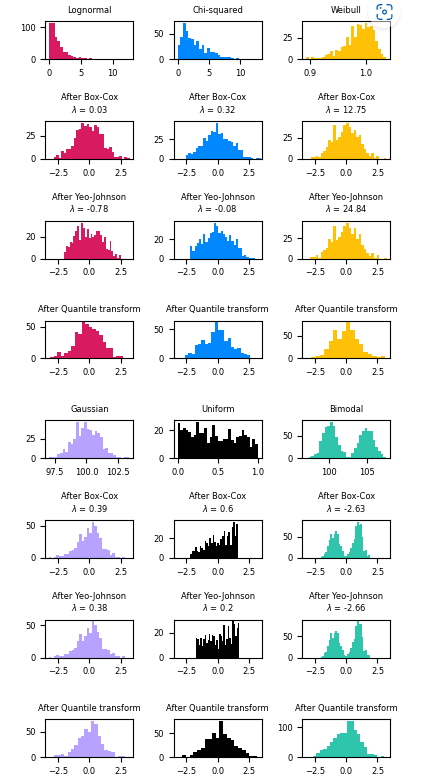

There are a couple of transformations that will transform data to fit the gaussian distribution, however, they are used for different circumstances. As shown above, applying any transformation will cause some to fit the distribution, while other transformations will not. In addition, the Box-Cox transformation can only transform data that has only positive values. We also have the quantile transform that will usually transform data to follow the uniform[0, 1] distribution, but can also transform data to follow the normal distribution.

In [ ]:
# Box-Cox or Yeo-Johnson through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox') # The transformation will standardize the data by default, unless set standardize=False
X_gaussian = pt.fit_transform(pd.DataFrame({'values': train_X}))

# Quantile transform

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0) # Set output_distribution to default for uniform[0, 1]
X_gaussian = qt.fit_transform(pd.DataFrame({'values': train_X}))